In [189]:
import pandas as pd
import numpy as np
from scipy import stats as sts, optimize
from sklearn import datasets, neighbors, cross_validation, metrics, naive_bayes
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

## 1. Метод k ближайших соседей
#### 10% баллов за задание, оценочное время выполнения: 20 минут

Сгенерируйте обучающую выборку из описанных двумя признаками объектов нескольких
классов и визуализируйте разделяющие поверхности, получаемые при решении задачи клас-
сифкации методом k ближайших соседей для разных k. Попробуйте подобрать оптимальное
значение количества соседей k с помощью 5-fold cross-validation, построив график зависимо-
сти accuracy в кросс-валидации от k.

In [92]:
X, y = datasets.make_classification(class_sep=1, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=3, n_clusters_per_class=1)
colors = ListedColormap(['red', 'blue', 'yellow'])
light_colors = ListedColormap(['lightcoral', 'lightblue', 'lightyellow'])

train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(X, y, test_size = 0.25)

In [107]:
scoring=[]
for i in range(1, 10):
    clf = neighbors.KNeighborsClassifier(n_neighbors=i)
    kf = cross_validation.cross_val_score(clf, X, y, cv=5)
    scoring.append((i,kf.mean()))

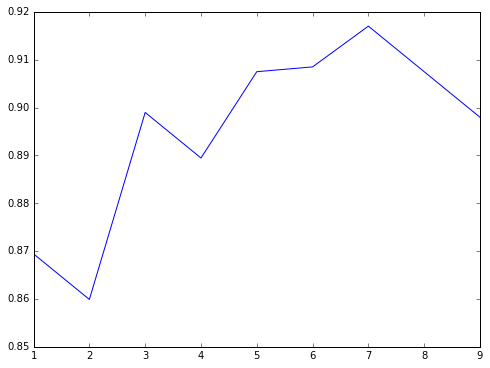

In [108]:
plt.figure(figsize=(8,6))
plt.plot(map(lambda x: x[0], scoring), map(lambda x: x[1], scoring))
plt.show()

In [99]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [102]:
def plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels, 
                          colors = colors, light_colors = light_colors):
    #fit model
    estimator.fit(train_data, train_labels)
    
    #set figure size
    plt.figure(figsize = (16, 6))
    
    #plot decision surface on the train data 
    plt.subplot(1,2,1)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(estimator.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    plt.title('Train data, accuracy={:.2f}'.format(metrics.accuracy_score(train_labels, estimator.predict(train_data))))
    
    #plot decision surface on the test data
    plt.subplot(1,2,2)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(test_data[:, 0], test_data[:, 1], c = test_labels, s = 100, cmap = colors)
    plt.title('Test data, accuracy={:.2f}'.format(metrics.accuracy_score(test_labels, estimator.predict(test_data))))

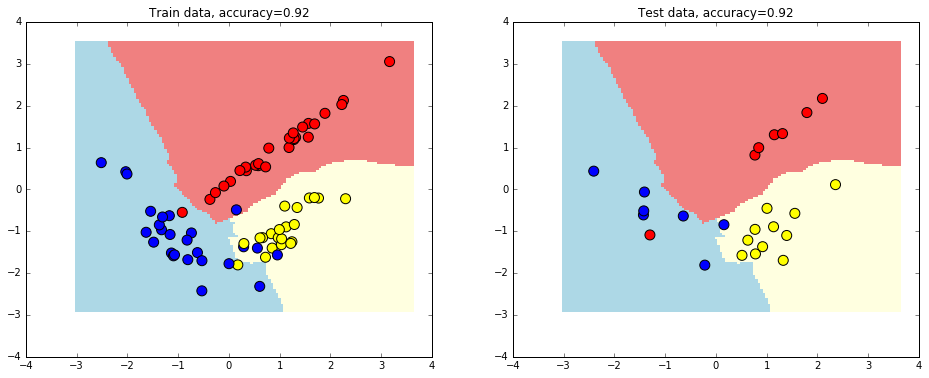

In [106]:
estimator = neighbors.KNeighborsClassifier(n_neighbors=7)

plot_decision_surface(estimator, train_data, train_labels, test_data, test_labels)

## 2. Наивный байесовский классификатор

#### 20% баллов за задание, оценочное время выполнения: 40 минут

Загрузите датасеты digits и breast_cancer из sklearn.datasets. Выведите несколько строчек
из обучающих выборок и посмотрите на признаки. С помощью sklearn.model_selection.cross_val_score
c настройками по умолчанию и вызова метода mean() у возвращаемого этой функцией numpy.ndarray,
сравните качество работы наивных байесовских классификаторов на этих двух датасетах. Для
сравнения предлагается использовать BernoulliNB, MultinomialNB и GaussianNB. Насколько
полученные результаты согласуются с вашими ожиданиями?
Два датасета, конечно, еще не повод делать далеко идущие выводы, но при желании вы
можете продолжить исследование на других выборках (например, из UCI репозитория).
Ответьте (прямо в ipynb блокноте с вашими экспериментами) на вопросы:
1. Каким получилось максимальное качество классификации на датасете breast_cancer?

0.936749280609

2. Каким получилось максимальное качество классификации на датасете digits?

0.870877148974

3. Какие утверждения из приведенных ниже верны?
(a) На вещественных признаках лучше всего сработал наивный байесовский класси-
фикатор с распределением Бернулли
(b) На вещественных признаках лучше всего сработал наивный байесовский класси-
фикатор с мультиномиальным распределением
(c) Мультиномиальное распределение лучше показало себя на выборке с целыми неот-
рицательными значениями признаков - ВЕРНО
(d) На вещественных признаках лучше всего сработало нормальное распределение - ВЕРНО

In [156]:
ds_digits = datasets.load_digits()
ds_cancer = datasets.load_breast_cancer()

ds_digits_data = ds_digits['data']
ds_digits_target = ds_digits['target']
ds_cancer_data = ds_cancer['data']
ds_cancer_target = ds_cancer['target']

In [158]:
clf = naive_bayes.BernoulliNB()
print 'digits:', cross_validation.cross_val_score(clf, ds_digits_data, ds_digits_target).mean()
print 'cancer:', cross_validation.cross_val_score(clf, ds_cancer_data, ds_cancer_target).mean()

digits: 0.825823650778
cancer: 0.627420402859


In [159]:
clf = naive_bayes.MultinomialNB()
print 'digits:', cross_validation.cross_val_score(clf, ds_digits_data, ds_digits_target).mean()
print 'cancer:', cross_validation.cross_val_score(clf, ds_cancer_data, ds_cancer_target).mean()

digits: 0.870877148974
cancer: 0.894579040193


In [160]:
clf = naive_bayes.GaussianNB()
print 'digits:', cross_validation.cross_val_score(clf, ds_digits_data, ds_digits_target).mean()
print 'cancer:', cross_validation.cross_val_score(clf, ds_cancer_data, ds_cancer_target).mean()

digits: 0.818600380355
cancer: 0.936749280609


## 3. Метрики в задаче регрессии

#### 40% баллов за задание, оценочное время выполнения: 120 минут

Сгенерируйте датасет из 500 точек на плоскости, для которых y = 0.5x + 1 + a, где a
распределено нормально с матожиданием 0 и дисперсией 0.2.
1. Визуализируйте выборку.
2. Восстановите по выборке зависимость y(x), считая, что зависимость имеет вид y = kx+b,
и минимизируя MSE на обучающей выборке, воспользовавшись scipy.optimize.minimize.
Визуализируйте восстановленную прямую.
3. Добавьте теперь в выборку 75 точек, для которых y = -1 + a, а x принимает различные
значения из того же диапазона, что и у уже имевшихся точек в обучающей выборке. По
новой расширенной выборке снова попробуйте восстановить зависимость y(x) = kx + b
двумя способами: минимизируя MSE и минимизируя MAE. Визуализируйте полученные
прямые.
4. На основе полученных графиков сделайте вывод об устойчивости моделей, оптимизи-
рующих MSE и MAE к выбросам.

In [252]:
def f(x, k):
    return map(lambda x: k[0] * x + k[1], x)
    
def MSE(k, x, y):
    return ((f(x,k) - y) ** 2).sum()

def MAE(k, x, y):
    return (np.abs(f(x,k) - y)).sum()

In [237]:
a = sts.norm(loc = 0, scale = 0.2).rvs(size = 500)
x = sts.uniform(-3, 6).rvs(size = 500)
y = 0.5 * x + 1 + a

In [238]:
prediction = optimize.minimize(MSE, (1, 1), args=(x,y))

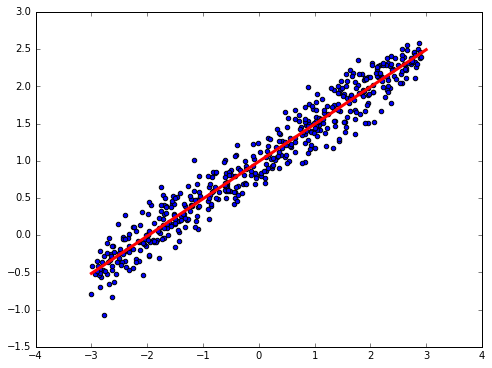

In [234]:
plt.figure(figsize=(8,6))
plt.scatter(x, y)
X=[-3,3]
plt.plot(X, f(X,prediction.x), 'r-', linewidth=3)
plt.show()

In [249]:
a2 = sts.norm(loc = 0, scale = 0.2).rvs(size = 75)
x2 = sts.uniform(-3, 6).rvs(size = 75)
y2 = -1 + a2

y2 = np.append(y, y2)
x2 = np.append(x, x2)

In [253]:
prediction2 = optimize.minimize(MSE, (1, 1), args=(x2,y2))
prediction3 = optimize.minimize(MAE, (1, 1), args=(x2,y2))

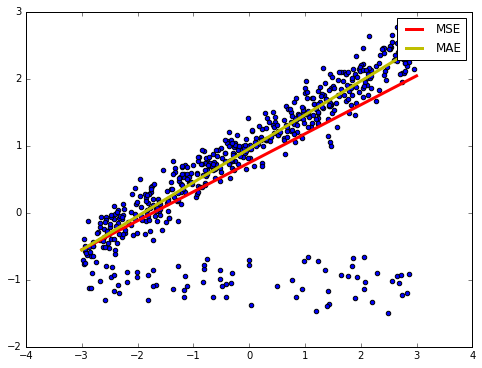

In [258]:
plt.figure(figsize=(8,6))
plt.scatter(x2, y2)
X=[-3,3]
plt.plot(X, f(X,prediction2.x), 'r-', linewidth=3, label='MSE')
plt.plot(X, f(X,prediction3.x), 'y-', linewidth=3, label='MAE')
plt.legend()
plt.show()

## 4. Теоретические задачи

#### 30% баллов за задание

### 4.1 Наивный байес и центроидный классификатор

### 4.2 ROC-AUC случайных ответов

### 4.3 Ошибка 1NN и оптимального байесовского классификатора